# Assignment 1
Group nr: 25 <br>
Erik Wold Riise, s194633 <br>
Lukas Rasocha, s233498 <br>
Zou Yong Nan Klaassen, s230351 <br>

# Part 1: Exploring the friendship paradox

### The friendship paradox in BA networks

The BA network is imported as a graphml.

In [70]:
import networkx as nx

BA = nx.read_graphml("BA_network.graphml")

A new network F_BA is created from the BA network to avoid confusion about the naming.

In [71]:
import random

F_BA = BA.copy()
node_i = random.choice(list(F_BA.nodes))
degree_i = F_BA.degree(node_i)
print(f"The degree of random node_i ({node_i}) is {degree_i}")

The degree of random node_i (3096) is 1


In [73]:
neighbors = list(F_BA.neighbors(node_i))
print(f"Neighbors of node {node_i}: {neighbors}")

avg_neighbors_degree = 0
if neighbors:
    neighbors_degrees = [F_BA.degree(neighbor) for neighbor in neighbors]
    avg_neighbors_degree = sum(neighbors_degrees) / len(neighbors)

print(f"Average degree of neighbors of node {node_i} is {avg_neighbors_degree}")

Neighbors of node 3096: ['555']
Average degree of neighbors of node 3096 is 2.0


In [74]:
if avg_neighbors_degree > degree_i:
    print(
        f"On average, node {node_i}'s friends have more friends ({avg_neighbors_degree}) than node {node_i} ({degree_i})."
    )
else:
    print(
        f"On average, node {node_i} has more friends ({degree_i}) than its friends ({avg_neighbors_degree})."
    )

On average, node 3096's friends have more friends (2.0) than node 3096 (1).


In [79]:
def friendship_paradox(G, iterations):
    friendship_paradox_count = 0
    for _ in range(iterations):
        node_i = random.choice(list(G))
        degree_i = G.degree(node_i)
        neighbors = list(G.neighbors(node_i))
    
        avg_neighbors_degree = 0
        if  neighbors:
            neighbors_degrees = [G.degree(neighbor) for neighbor in neighbors]
            avg_neighbors_degree = sum(neighbors_degrees) / len(neighbors)
    
        if avg_neighbors_degree > degree_i:
            friendship_paradox_count+=1
    
    percentage = round((friendship_paradox_count / iterations) * 100 , 2)
    print(f"The Friendship Paradox holds true {friendship_paradox_count} out of {iterations}.")
    print(f"That is {percentage}% of the time.")

    return percentage

ba_percentage = friendship_paradox(F_BA, 1000)

The Friendship Paradox holds true 853 out of 1000.
That is 85.3% of the time.


The print outs above show how many times out of 1000 the friendship paradox holds true for the F_BA network.

### The friendship paradox more generally

Note: in this exercise γ, α, alpha are used interchangeably

#### What if the power law is flatter, e.g. $p(k)∼k^{−γ}$ with $γ=2$? Will the fraction of times the paradox is true be higher or lower?
The friendship paradox states that on average individuals have fewer friends than their friends do. In the case of a flatter power law distribution (such as $γ=2$), there will be more individuals with a greater number of connections across the network (a higher degree). This leads to a situation where on average your friends will have more friends than you do, as they are more likely to include those highly connected individuals (hubs). Due to the increased prevalence of hubs in a flatter distribution, the fraction of times the friendship paradox holds true will be higher.


To simulate a new network with the slope mentioned above $γ=2$, we can use the configuration model of networkx. For this we calculate a degree sequence using the transformation method [1].
- Generate random variable $r$ that is uniformly distributed in the range $0≤r<1$
- Use the random variable $r$ to transform it into a power-law distribution random variable x (in the range of $x_{min}≤x<∞$) using the following formula: $x = x_{min}(1–r)^{−1/α−1}$
- $x_{min}$ is the lower limit for the distribution; 
- $\alpha$ is the exponent of the power-law distribution, the slope

In [80]:
n_nodes = 5000
alpha = 2
x_min = 1

def power_law_degree_sequence(n_nodes, alpha, x_min):
    degrees = []
    for _ in range(n_nodes):
        r = random.random()
        degree = x_min * (1 - r)**(-1 / (alpha - 1))
        degrees.append(int(round(degree)))

    if sum(degrees) % 2 != 0:
        degrees[random.randint(0, n_nodes-1)] += 1
        
    return degrees

degree_sequence = power_law_degree_sequence(n_nodes, alpha, x_min)

G_power_law = nx.configuration_model(degree_sequence)
G_power_law = nx.Graph(G_power_law)
G_power_law.remove_edges_from(nx.selfloop_edges(G_power_law))

pl_percentage  = friendship_paradox(G_power_law, 1000)

The Friendship Paradox holds true 991 out of 1000.
That is 99.1% of the time.


We observe that the reasoning was correctly as shown above the percentage of when the friendship paradox holds with the new slope γ=2 is higher than in the F_BA network.

### The friendship paradox and the configuration model

In [81]:
# First we generate a network for the configuration model that has the same slope and number of nodes as F-BA in A above 
degree_sequence = [degree for node, degree in F_BA.degree()]
n_nodes = len(degree_sequence)

F_CM = nx.configuration_model(degree_sequence)
F_CM = nx.Graph(F_CM)
F_CM.remove_edges_from(nx.selfloop_edges(F_CM))

#  What fraction of the time is the friendship paradox is true for the F-CM network?

f_cm_percentage = friendship_paradox(F_CM, 1000)

The Friendship Paradox holds true 644 out of 1000.
That is 64.4% of the time.


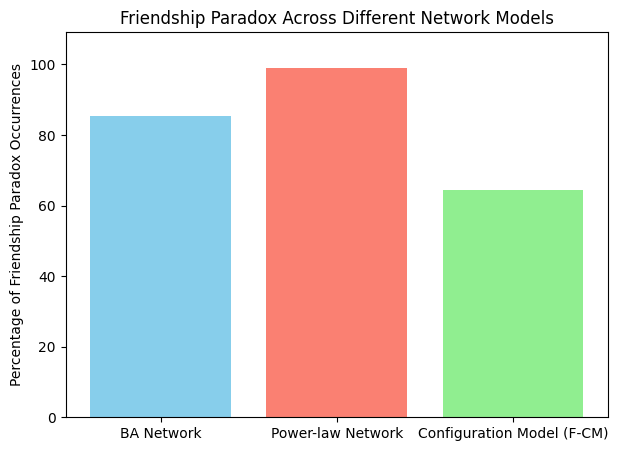

In [82]:
from matplotlib import pyplot as plt
networks = ['BA Network', 'Power-law Network', 'Configuration Model (F-CM)']
percentages = [ba_percentage, pl_percentage, f_cm_percentage]

plt.figure(figsize=(7,5))
bars = plt.bar(networks, percentages, color=['skyblue', 'salmon', 'lightgreen'])

plt.ylabel('Percentage of Friendship Paradox Occurrences')
plt.title('Friendship Paradox Across Different Network Models')
plt.ylim(0, max(percentages) + 10)
plt.show()

> Assuming that **F-BA** and **F-CM** have the same degree sequence can now *think* about if **F-BA** and **F-CM** are different with respect to the friendship paradox. Specifically, please explain your thoughts on the following topics:

> - Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).

From the bar chart above we can see that even though the F-CM netwowk was generated to have the same amount of nodes and the same degree sequence as the BA network, the friendship paradox holds true less often in the F-CM network. This indicates that there are other factors beyond the degree-distribution that could impact how frequently the friendship paradox is true. This is also mentioned in the article "The friendship paradox in real and model networks" by George T Cantwell ([reference](https://academic.oup.com/comnet/article/9/2/cnab011/6287259)), where they mention that in random graphs (such that the configuration model generates) the degrees lack correlations or assortativity (the tendency of nodes to connect to other nodes with similar degrees) which is present in real networks. This could be a reason why the friendship paradox between the two networks differ (friendship paradox is stronger in networks with negative assortavity ([reference](https://academic.oup.com/comnet/article/9/2/cnab011/6287259)) which the random F-CM network does not have).

In the [paper](https://appliednetsci.springeropen.com/articles/10.1007/s41109-021-00391-6) by Sergei P. Sidorov. The authors examined the friendship paradox (or more concretely the friendship index) for the BA model and Triadic closure model. They mention that in real world networks that are among others driven by the preferential attachement (same as the BA network) the friendship index was was greater than 1 for vast majority of the nodes. They also mention that for the triadic closure model (which has very high clustering) the friendship index was even higher than for the BA model. Both these results give an explanation to why the friendship paradox holds true less often in the F-CM random network (where the clustering is low and there is no preferential attachement because of the randomness).

So, in summary, the friendship paradox is dependent on many other factors than just the degree distribution, these factors are often not present in random networks such as the configuration model and therefore the friendship paradox is less likely to hold true.

> - How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)


We would first start with a null hypothesis that the friendship paradox is equally true in both networks. Or in other words
$$
H_0: P(\text{paradox true in F-BA}) = P(\text{paradox true in F-CM})
$$

Or in other words

$$
H_0: P(\text{paradox true in F-BA}) - P(\text{paradox true in F-CM}) = 0
$$

Then we would run our `friendship_paradox` function many times (e.g. 1000) and calculate the difference in the percentage of times the friendship paradox holds true in the two networks. After that we would plot the differences with a histogram (calculate the mean and standard deviation) and then we would check whether $0$ (which is the $H_0$ hypothesis) is within the 95 % confidence interval of the differences. If it is not, we would reject the null hypothesis at the 5 % significance level.

### Growth without preferential attachement

> 1. Grow a new network (the Sune-network) with the same parameters as the **F-BA** network in the exercise above, i.e. 5000 nodes, each new node connects to the existing network, but with one key difference: *have the incoming nodes connect to the existing nodes with* **equal probability**. This is the Sune-network.

In [83]:
N = 5000
m0 = 5        
m = 5         

Sune = nx.complete_graph(m0)

for new_node in range(m0, N):
    existing_nodes = list(Sune.nodes())
    targets = set()
    num_neighbours = random.randint(1, m)
    while len(targets) < num_neighbours:
        target = random.choice(existing_nodes)
        targets.add(target)
    
    Sune.add_node(new_node)
    edges = [(new_node, target) for target in targets]
    Sune.add_edges_from(edges)

> 2. Generate an ER network of same number of nodes and links as the Sune-network. 

> * What are the differences between the ER network and the Sune-network? Explain in your own words. 

The main difference is that Sune's network grows over time, whereas ER is a static network where all nodes and connections are created at the same time (no growth). When analysing both below we see some differences in their characteristics. The degree distribution is quite similar, however Sune's network has a heavier right tail, meaning that there are more nodes with a higher degree. I believe this is because of the growth property of Sune's network, where nodes added earlier had more opportunities to gain connections than nodes added later. 

Looking further, Sune's network has one large connected component, whereas ER has 20. This again makes sense, since in Sune's network we just keep adding nodes to the network, meanwhile in ER we add all nodes and connections at the same time randomly. The other properties (clustering, average shortest path length) didn't show any large differences.


In [84]:
ER = nx.gnm_random_graph(N, Sune.number_of_edges())

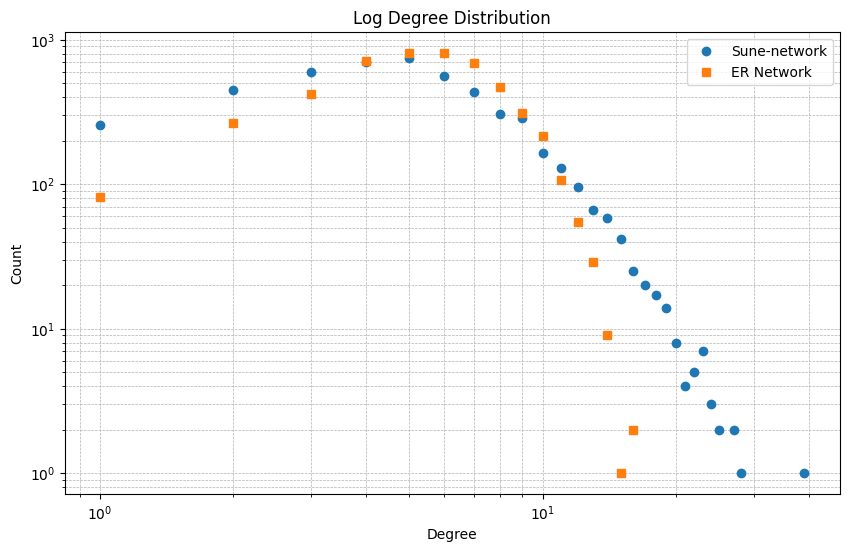

In [86]:
import collections
def plot_degree_distribution_two_networks(G1, G2, label1, label2):
    degrees_G1 = [d for n, d in G1.degree()]
    degrees_G2 = [d for n, d in G2.degree()]
    
    degree_counts_G1 = collections.Counter(degrees_G1)
    degree_counts_G2 = collections.Counter(degrees_G2)
    
    deg_G1, cnt_G1 = zip(*sorted(degree_counts_G1.items()))
    deg_G2, cnt_G2 = zip(*sorted(degree_counts_G2.items()))

    plt.figure(figsize=(10,6))
    plt.loglog(deg_G1, cnt_G1, marker='o', linestyle='None', label=label1)
    plt.loglog(deg_G2, cnt_G2, marker='s', linestyle='None', label=label2)

    plt.title('Log Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.show()

# Plot the degree distributions
plot_degree_distribution_two_networks(Sune, ER, 'Sune-network', 'ER Network')

In [87]:
# Number of connected components in each network
num_components_Sune = nx.number_connected_components(Sune)
num_components_ER = nx.number_connected_components(ER)

print(f"Number of connected components in Sune-network: {num_components_Sune}")
print(f"Number of connected components in ER Network: {num_components_ER}")

Number of connected components in Sune-network: 1
Number of connected components in ER Network: 20


In [88]:
# Average clustering coefficient
clustering_Sune = nx.average_clustering(Sune)
clustering_ER = nx.average_clustering(ER)

print(f"Average clustering coefficient in Sune-network: {clustering_Sune:.4f}")
print(f"Average clustering coefficient in ER Network: {clustering_ER:.4f}")

Average clustering coefficient in Sune-network: 0.0018
Average clustering coefficient in ER Network: 0.0013


In [89]:
average_path_length_Sune = nx.average_shortest_path_length(Sune)

# ER is disconnected
largest_cc_ER = max(nx.connected_components(ER), key=len)
ER_subgraph = ER.subgraph(largest_cc_ER).copy()
average_path_length_ER = nx.average_shortest_path_length(ER_subgraph)

print(f"Average path length in Sune-network: {average_path_length_Sune:.4f}")
print(f"Average path length in ER Network: {average_path_length_ER:.4f}")

Average path length in Sune-network: 4.8666
Average path length in ER Network: 4.9944


# Part 2: Stats of the Country Music Network

This part requires a build of the network described in the excersise from week 4. As it is not stated that the building of the network is to be reviewed, we include the network in the submsission as a separate graphml file.

In [13]:
import networkx as nx

%matplotlib inline

G = nx.read_graphml("country_performers_network.graphml")

# *Simple network statistics and analysis*

To start we look at the the basic statistics of nodes and edges in the network. We can find these with simple networkx functions. (Note that we already have extracted the largest component, so all the following statistics are for the largest component only.)

In [14]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 1945
Number of edges: 17675


This means that there are 1945 artist in the largest component, and 17675 edges between them, which is a very dense network. Next we plot the degree distribution of the network.

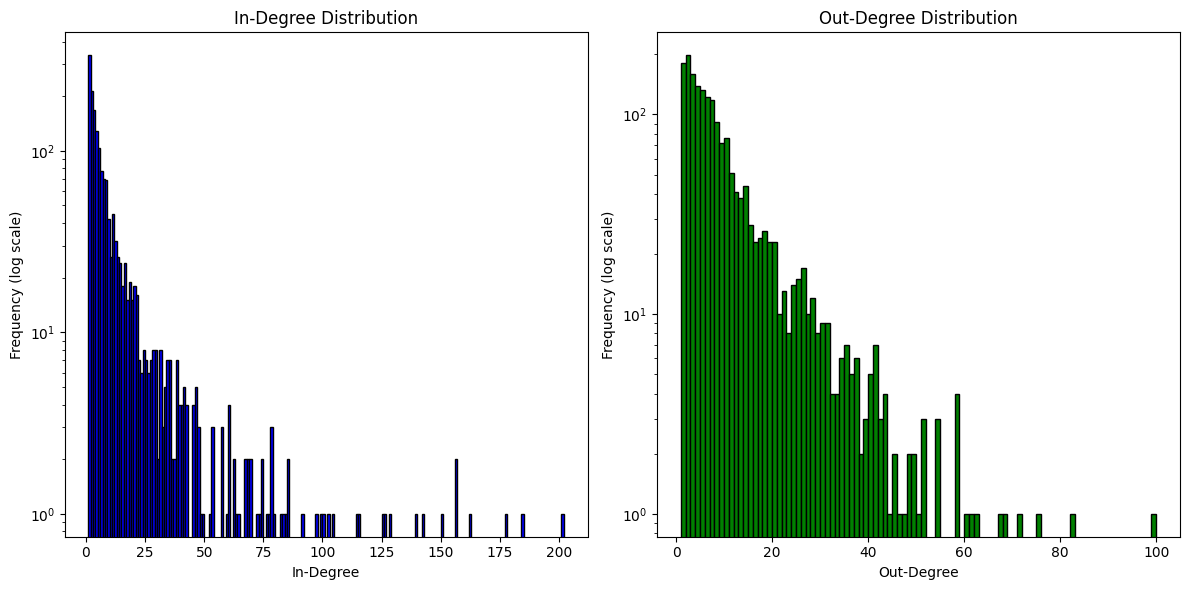

In [15]:
import matplotlib.pyplot as plt

in_degrees = [G.in_degree(n) for n in G.nodes]
out_degrees = [G.out_degree(n) for n in G.nodes]
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(
    in_degrees,
    bins=range(1, max(in_degrees) + 1),
    color="blue",
    edgecolor="black",
    log=True,
)
plt.title("In-Degree Distribution")
plt.xlabel("In-Degree")
plt.ylabel("Frequency (log scale)")
plt.subplot(122)
plt.hist(
    out_degrees,
    bins=range(1, max(out_degrees) + 1),
    color="green",
    edgecolor="black",
    log=True,
)
plt.title("Out-Degree Distribution")
plt.xlabel("Out-Degree")
plt.ylabel("Frequency (log scale)")

plt.tight_layout()
plt.show()

**Figure 2.1: Degree distribution of the country music network.** We show the degree distribution of the network on a log scale. Both the in degree and out degree distributions appear right-skewed, with a few nodes having very high degree, and most nodes having low degree. This entails that there are a few artists who have a lot of links to other artists, while most artists have only a few links. 

For reference and comparison we plot the in-degree of a random network and the out-degree of a scale-free network.

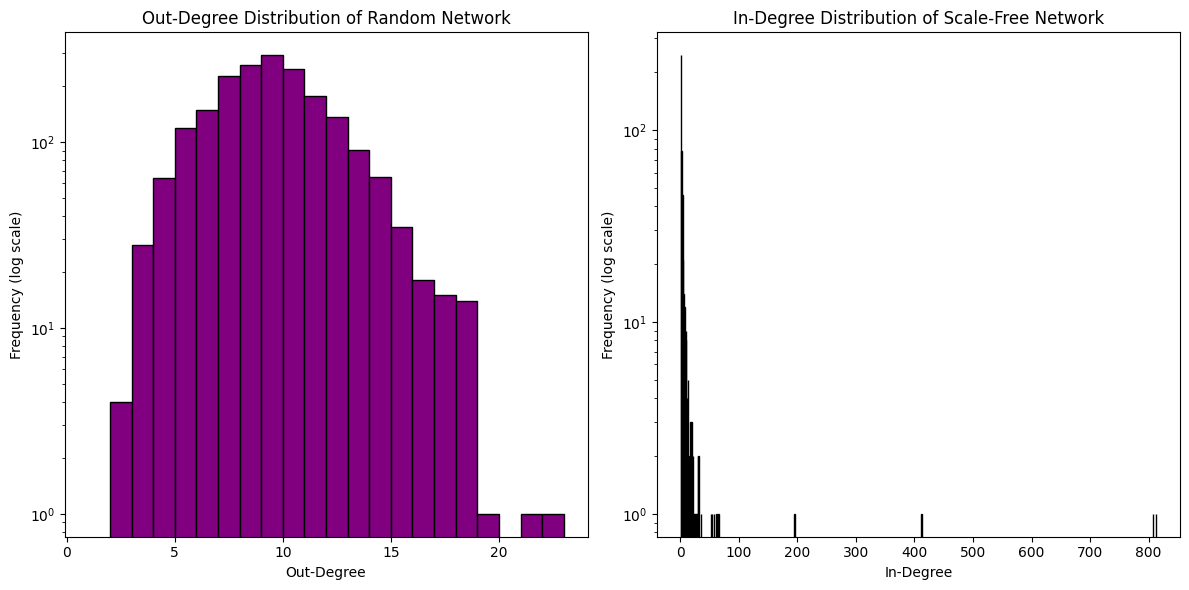

In [16]:
G_random = nx.gnm_random_graph(num_nodes, num_edges, directed=True)
rand_out_degrees = [G_random.out_degree(n) for n in G_random.nodes]
G_scale_free = nx.scale_free_graph(num_nodes)
sf_in_degrees = [G_scale_free.in_degree(n) for n in G_scale_free.nodes]

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(
    rand_out_degrees,
    bins=range(1, max(rand_out_degrees) + 1),
    color="purple",
    edgecolor="black",
    log=True,
)
plt.title("Out-Degree Distribution of Random Network")
plt.xlabel("Out-Degree")
plt.ylabel("Frequency (log scale)")

plt.subplot(122)
plt.hist(
    sf_in_degrees,
    bins=range(1, max(sf_in_degrees) + 1),
    color="orange",
    edgecolor="black",
    log=True,
)
plt.title("In-Degree Distribution of Scale-Free Network")
plt.xlabel("In-Degree")
plt.ylabel("Frequency (log scale)")

plt.tight_layout()
plt.show()

**Figure 2.2: Degree distribution of random and scale-free networks.** The in-degree distribution of a random network and the out-degree distribution of a scale-free network are shown for comparison. The random network's degree distribution follows a Poisson distribution, which is symmetric and peaks at the mean degree. In contrast, the scale-free network follows a power-law distribution, which is right-skewed with a long tail.

Both the in-degree and out-degree distributions of the country music network are more similar to the scale-free network than the random network. Even though the scale-free network has a much longer tail when compared to the country music network, the country music network still has a few nodes with very high degree, which is a characteristic of scale-free networks. There might be a case for comparing the out-degree of the country music network to the out-degree of the random network (it is closer than the in-degree), but the country music network is more right-skewed than the random network.

Next, we look at the top 5 artists with the highest in-degree and out-degree.

In [17]:
top_5_in_degree = sorted(G.in_degree, key=lambda x: x[1], reverse=True)[:5]
print("Top 5 performers by in-degree:")
for performer, degree in top_5_in_degree:
    print(f"{performer}: {degree}")
print("")
top_5_out_degree = sorted(G.out_degree, key=lambda x: x[1], reverse=True)[:5]
print("Top 5 performers by out-degree:")
for performer, degree in top_5_out_degree:
    print(f"{performer}: {degree}")

Top 5 performers by in-degree:
Willie_Nelson: 202
Johnny_Cash: 184
Elvis_Presley: 177
Dolly_Parton: 162
George_Jones: 156

Top 5 performers by out-degree:
Hillary_Lindsey: 100
Pam_Tillis: 82
Randy_Travis: 75
Vince_Gill: 71
Patty_Loveless: 68


The top artists by in degree are typical famous artists (even though some of them might not be best known for their country music). Our hypothesis is that a lot of smaller artists who collaborate with these big artists will have a link to them. The top artists by out degree are less known to us, the top artist, Hillary Lindsey, is a songwriter who has written songs for many famous artists. This might be a reason why she has a high out-degree, as she has written songs for many artists in the network.

To further examine, we look at the artists with the longest wiki entries.

In [18]:
top_10_longest_entries = sorted(
    G.nodes(data=True), key=lambda x: x[1]["length"], reverse=True
)[:10]
print("\nTop 10 pages with the longest wiki entries:")
for node, data in top_10_longest_entries:
    print(f"{node}: {data['length']} words")


Top 10 pages with the longest wiki entries:
Beyoncé: 62896 words
Taylor_Swift: 56352 words
Miley_Cyrus: 51262 words
Justin_Bieber: 50694 words
Carrie_Underwood: 45245 words
Justin_Timberlake: 44775 words
Demi_Lovato: 44189 words
Bob_Dylan: 41087 words
Ed_Sheeran: 36322 words
Elvis_Presley: 33740 words


We observe that these are mainly famous artists, which is expected. The length of the wiki entry might be a proxy for how famous an artist is, as more famous artists are likely to have more information available about them.

# *Let's build a simple visualization of the network*

To build the network visualization, we convert the graph to an undirected graph, as the graph is very dense. We make the node size dependent on node degree, and the color dependent on the length of the wiki entry. The graph is drawn as a kamada-kawai layout [2], which is a force-directed layout.

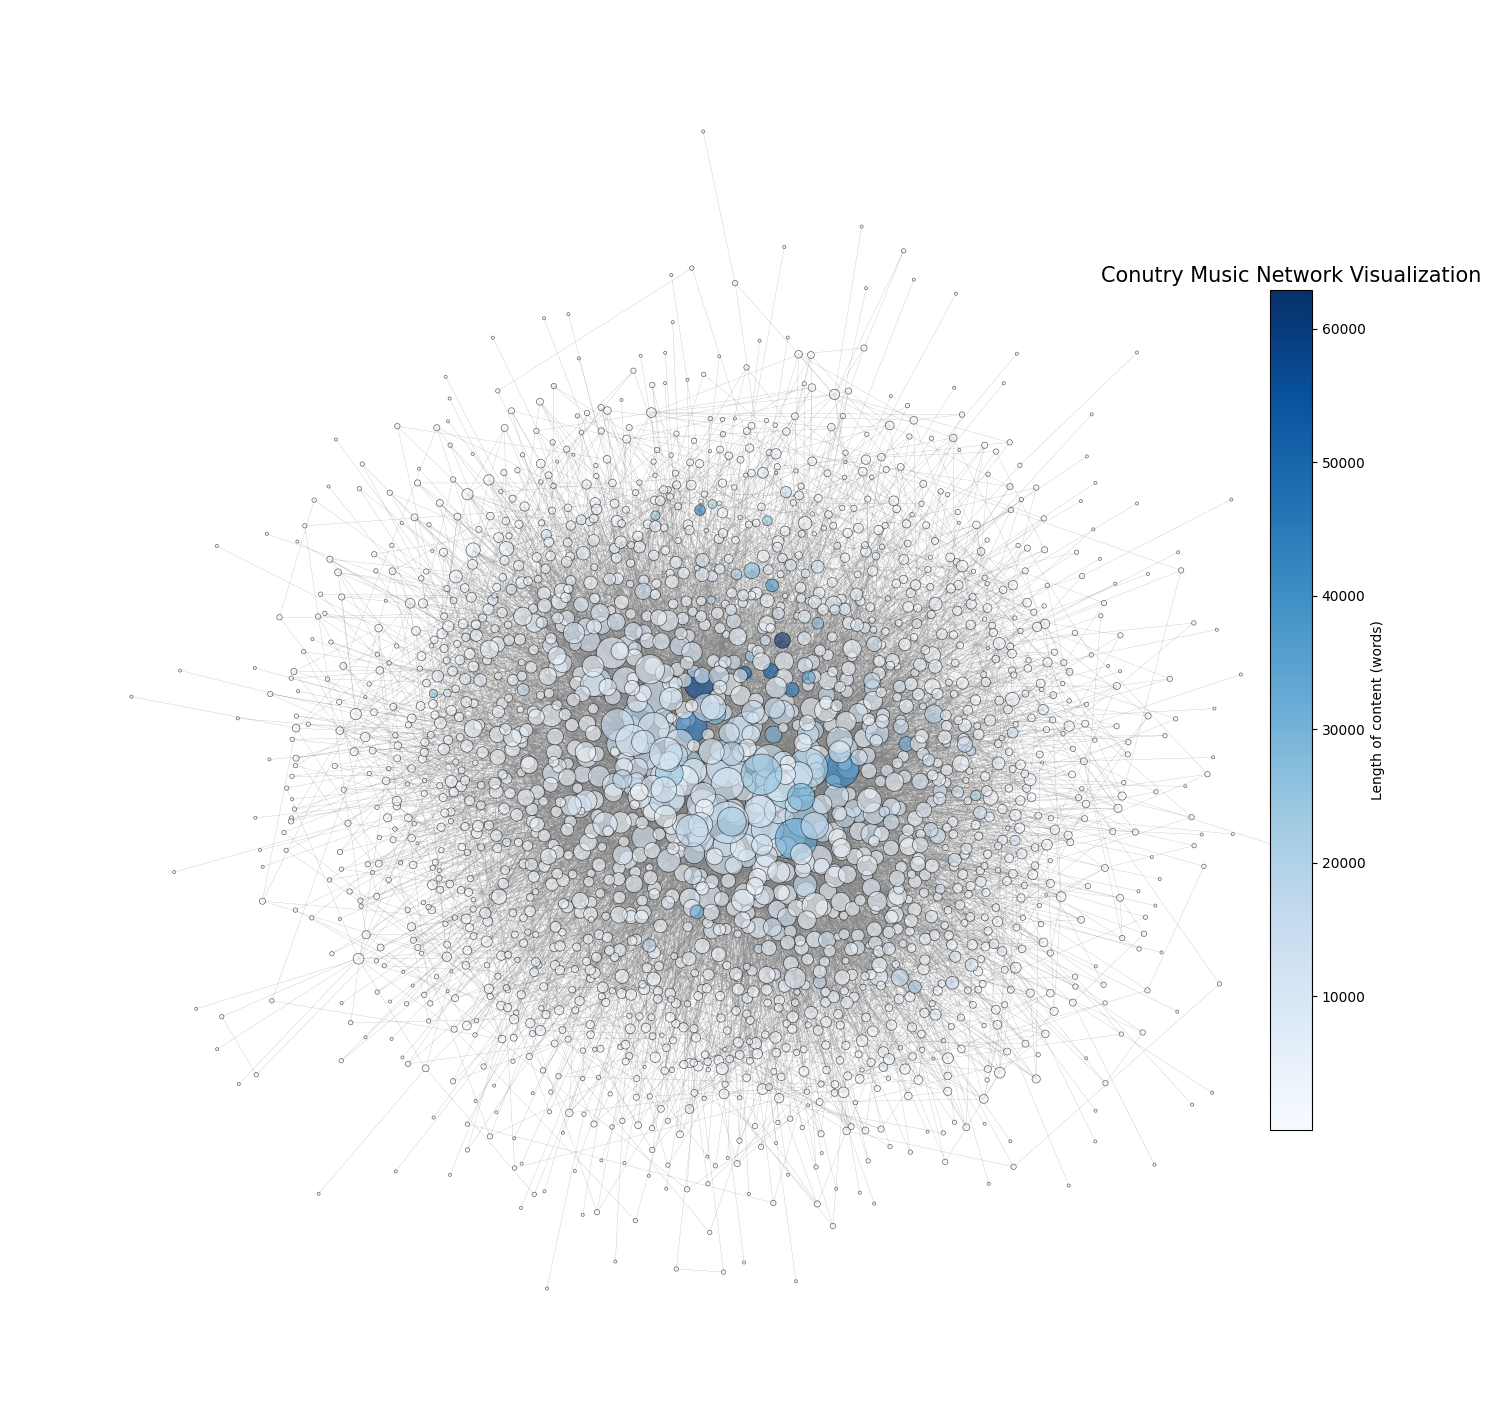

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


G_undirected = G.to_undirected()

node_sizes = [G_undirected.degree(node) * 5 for node in G_undirected.nodes]
lengths = nx.get_node_attributes(G_undirected, "length")
node_colors = [lengths[node] for node in G_undirected.nodes]
norm = plt.Normalize(vmin=min(node_colors), vmax=max(node_colors))
cmap = plt.cm.Blues


plt.figure(figsize=(14, 14))
pos = nx.kamada_kawai_layout(G_undirected)

nx.draw(
    G_undirected,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=cmap,
    edge_color="gray",
    with_labels=False,
    alpha=0.6,
    linewidths=0.5,
    edgecolors="black",
    width=0.2,
)

cax = plt.gcf().add_axes([0.9, 0.2, 0.03, 0.6])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, cax=cax, label="Length of content (words)")

plt.title("Conutry Music Network Visualization", fontsize=15)
plt.show()

**Figure 2.3: Visualization of the country music network.** The network is visualized with a kamada-kawai layout. The node size is dependent on node degree, and the color is dependent on the length of the wiki entry. The network is very dense, and it is hard to see the individual nodes, but we can see that there are nodes with very high degree. There are a lot of gray nodes, which are short entries, and a few nodes with a lot of information.

References:

[1] Newman, M.E.J. “Power laws, Pareto distributions and Zipf's law” (2004). <br>
[2] Kawai, Shinji. “An Algorithm for Drawing General Undirected Graphs Tomihisa Kamada and Satoru Kawai.” (1989).